In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Load the data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
X_train_full.shape, y_train_full.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
# y_train_full heeft (5000, 1) en staat rechtop. Een (5000,) zou horizontaal staan
y_train_full[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# Laatste 10_000 voor validatieset, de rest voor trainingset
X_val = X_train_full[-10000:]
y_val = y_train_full[-10000:]

X_train = X_train_full[:-10000]
y_train = y_train_full[:-10000]

In [6]:
print(X_val.shape, y_val.shape)
print(X_train.shape, y_train.shape)

(10000, 32, 32, 3) (10000, 1)
(40000, 32, 32, 3) (40000, 1)


## 1.2 Some data exploration

In [7]:
# Aantal instanties van elke categorie
np.unique(y_train_full, return_counts=True) # geeft van elke klasse 5000
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([3986, 3986, 4048, 3984, 4003, 3975, 4020, 4023, 3997, 3978]))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
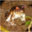

In [8]:
X_train[0]

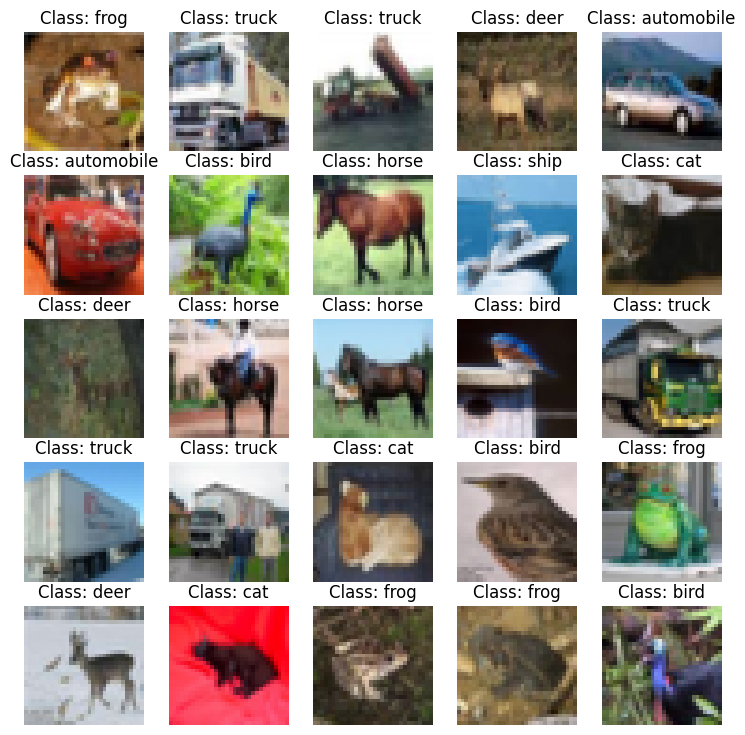

In [9]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(9, 9))
index = 0
for image, label in zip(X_train[:25], y_train[:25].reshape(-1)):
    index += 1
    plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")

plt.show()

## 1.3 Create model

In [10]:
def get_model():
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(32, 32, 3)))
  model.add(keras.layers.Rescaling(scale=1./255, name="rescale"))
  model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", name="conv1"))
  model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", name="conv2"))
  model.add(keras.layers.MaxPool2D(pool_size=(2,2), name="pool1"))
  model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name="conv3"))
  model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name="conv4"))
  model.add(keras.layers.MaxPool2D(pool_size=(2,2), name="pool2"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=128, activation="relu", name="dense1"))
  model.add(keras.layers.Dense(units=10, activation="softmax", name="output"))

  return model

In [11]:
model = get_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model(X_train[:1]).shape

# modellen werken enkel op batches, niet op 1 voorbeeld tegelijkertijd
# willen we toch één instantie, dan kan je ze in een range zoals hierboven selecteren

# dimensies: 32x32 -> stride is standaard 1, padding is same dus dims blijven hetzelfde
# 32x32x32 -> 32 filters

# Output na conv1: TensorShape([1, 32, 32, 32])

# Output na pooling -> halveert dimensies van afbeeldingen maar aantal filters ongewijzigd: TensorShape([1, 16, 16, 32])

# Output na conv3 -> 64 filters: TensorShape([1, 16, 16, 64])

# Output na flatten -> 8 * 8 * 64 filters: TensorShape([1, 4096])

TensorShape([1, 10])

In [13]:
# Aantal parameters laag conv1
n_filters = 32
filter_dims = 3 * 3
img_channels = 3
n_bias = 1

params = n_filters * (filter_dims * img_channels + n_bias)
print(params)

896


In [14]:
# Aantal parameters laag conv2
n_filters = 32
filter_dims = 3 * 3
img_channels = 32 # omgezet in vorige laag van 3 naar 32
n_bias = 1

params = n_filters * (filter_dims * img_channels + n_bias)
print(params)

9248


## 1.4 Compile the model

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=1./1000)

model.compile(
    optimizer,
    loss="sparse_categorical_crossentropy", # labels zijn reële getallen dus sparse nodig
    metrics=["accuracy"]
)

## 1.5 Train the model

In [16]:
# Valideren of het werkt: fit eens uitvoeren voor 1 epoch
model.fit(X_train, y_train, epochs=1)

# Runtime verandert van CPU naar GPU -> tijd voor 1 epoch 2-3 minuten naar 10 seconden

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3571 - loss: 1.7414


In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

In [18]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          callbacks=[early_stopping])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6272 - loss: 1.0466 - val_accuracy: 0.6843 - val_loss: 0.8990
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7077 - loss: 0.8280 - val_accuracy: 0.7002 - val_loss: 0.8690
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7629 - loss: 0.6826 - val_accuracy: 0.7284 - val_loss: 0.7825
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8078 - loss: 0.5464 - val_accuracy: 0.7243 - val_loss: 0.8246
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8398 - loss: 0.4527 - val_accuracy: 0.7315 - val_loss: 0.8188
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8769 - loss: 0.3556 - val_accuracy: 0.7378 - val_loss: 0.8957
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9007 - loss: 0.2870 - val_accuracy: 0.7378 - val_loss: 0.9436
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9272 - loss: 0

In [19]:
def plot_learning_curves(history):
  plt.figure(figsize =(8, 5))

  for key , style in zip(history.history , ["r-o", "r-*", "b-o", "b-*"]):
    epochs = np.array(history.epoch)
    plt.plot(epochs + 1, history.history[key], style , label=key)

  plt.xlabel("Epoch")
  plt.axis([1, len(history.history["loss"]), 0., 1])
  plt.legend(loc="lower left")
  plt.grid()

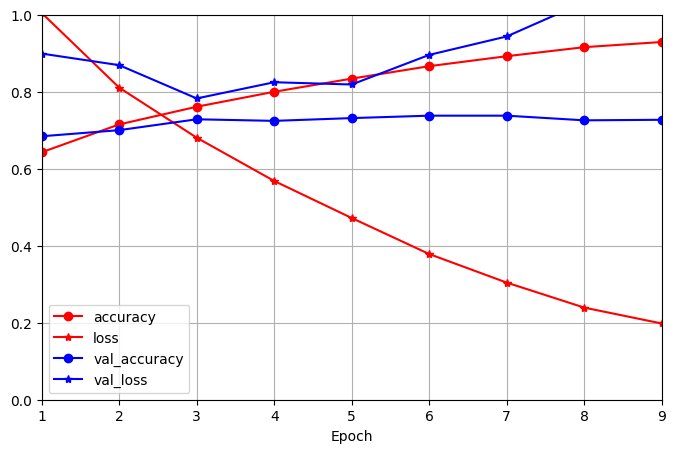

In [20]:
plot_learning_curves(history)

Toont overfitting!
- Loss op training data blijft dalen, accuraatheid blijft stijgen
- Loss op validatie data zakt en stijgt, accuraatheid blijft min of meer gelijk

## 1.6 Evaluate model

In [22]:
model.evaluate(X_test, y_test, verbose=0)
# 73% op test set is vergelijkbaar met validatie van hierboven

[0.9361769556999207, 0.7312999963760376]

In [23]:
model.evaluate(X_train, y_train, verbose=0)

[0.2670225501060486, 0.9096500277519226]

Waarom krijgen we niet dezelfde accuracy van onze beste epoch bij het fitten?

> Die waarde is een gemiddelde van de accuraatheid over die epoch.

Bijna 17% verschil tussen test en training set => stevige overfitting